<a href="https://colab.research.google.com/github/ljmacnee/MNIST_DataSet_Testing/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = torch.relu(nn.MaxPool2d(2)(self.conv1(x)))
        x = torch.relu(nn.MaxPool2d(2)(self.conv2(x)))
        x = x.view(-1, 320)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the loss function and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# Load the MNIST dataset and apply transformations
dataset = datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

# split the data into training and validation sets
validation_split = 0.2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
valid_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, 
                                           sampler=train_sampler)
validation_loader = torch.utils.data.DataLoader(dataset, batch_size=64,
                                                sampler=valid_sampler)

# Train the model
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    # print the loss for each epoch
    print('Epoch:', epoch, 'Loss:', loss.item())
    # validate the model on unseen data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in validation_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    print('Validation Accuracy:', accuracy)
    model.train()


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch: 0 Loss: 0.1920890063047409
Validation Accuracy: 95.54166666666667
Epoch: 1 Loss: 0.055268872529268265
Validation Accuracy: 96.975
Epoch: 2 Loss: 0.042465176433324814
Validation Accuracy: 97.68333333333334
Epoch: 3 Loss: 0.0610218271613121
Validation Accuracy: 98.275
Epoch: 4 Loss: 0.040109701454639435
Validation Accuracy: 98.075
Epoch: 5 Loss: 0.08195667713880539
Validation Accuracy: 98.45833333333333
Epoch: 6 Loss: 0.07666132599115372
Validation Accuracy: 98.35
Epoch: 7 Loss: 0.007851219736039639
Validation Accuracy: 98.39166666666667
Epoch: 8 Loss: 0.012564269825816154
Validation Accuracy: 98.46666666666667
Epoch: 9 Loss: 0.0011938333045691252
Validation Accuracy: 98.51666666666667


In [ ]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image

# Define a function to convert the image tensor to a jpeg
def tensor_to_jpeg(tensor, index, save_dir):
    img = transforms.ToPILImage()(tensor)
    img_path = os.path.join(save_dir, f"{index}.jpg")
    img.save(img_path)
    return img_path

# Define a function to convert the label tensor to a txt file
def tensor_to_txt(tensor, index, save_dir):
    label = str(tensor)
    label_path = os.path.join(save_dir, f"{index}.txt")
    with open(label_path, "w") as f:
        f.write(str(label))
    return label_path

# Define the location to save the images and labels
save_dir = "mnist_images_and_labels"
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

# Load the MNIST dataset
mnist_dataset = datasets.MNIST(root=".", download=True, transform=transforms.ToTensor())

# Iterate over the dataset, convert the images and labels to jpeg and txt files respectively
for index, (image, label) in enumerate(mnist_dataset):
    img_path = tensor_to_jpeg(image, index, save_dir)
    label_path = tensor_to_txt(label, index, save_dir)
    print(f"{img_path} and {label_path} saved.")


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
mnist_images_and_labels/55000.jpg and mnist_images_and_labels/55000.txt saved.
mnist_images_and_labels/55001.jpg and mnist_images_and_labels/55001.txt saved.
mnist_images_and_labels/55002.jpg and mnist_images_and_labels/55002.txt saved.
mnist_images_and_labels/55003.jpg and mnist_images_and_labels/55003.txt saved.
mnist_images_and_labels/55004.jpg and mnist_images_and_labels/55004.txt saved.
mnist_images_and_labels/55005.jpg and mnist_images_and_labels/55005.txt saved.
mnist_images_and_labels/55006.jpg and mnist_images_and_labels/55006.txt saved.
mnist_images_and_labels/55007.jpg and mnist_images_and_labels/55007.txt saved.
mnist_images_and_labels/55008.jpg and mnist_images_and_labels/55008.txt saved.
mnist_images_and_labels/55009.jpg and mnist_images_and_labels/55009.txt saved.
mnist_images_and_labels/55010.jpg and mnist_images_and_labels/55010.txt saved.
mnist_images_and_labels/55011.jpg and mnist_images_and_labels/55011.txt saved.
m

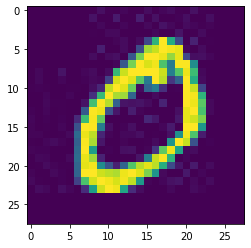

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the image
img = Image.open("/content/mnist_images_and_labels/1.jpg")

# Convert the image to an array
img_array = np.array(img)

# Display the image
plt.imshow(img_array)
plt.show()




In [ ]:
with open('/content/mnist_images_and_labels/1.txt', 'r') as file:
    contents = file.read()
    print(contents)

0


In [ ]:
import os
import torch
from torchvision import datasets, transforms
from PIL import Image
from torch.utils.data import TensorDataset, DataLoader

# Define the location to save the images and labels
save_dir = "mnist_images_and_labels"

# Create empty lists to store the images and labels
images, labels = [], []

# Iterate over the file name index
i = 1
while True:
    image_file = f"{i}.jpg"
    label_file = f"{i}.txt"
    # Get the image file path
    image_path = os.path.join(save_dir, image_file)
    label_path = os.path.join(save_dir, label_file)
    # Check if the image file and label file exist
    if os.path.exists(image_path) and os.path.exists(label_path):
        # Open the image and convert it to a tensor
        img = Image.open(image_path)
        img_tensor = transforms.ToTensor()(img)
        images.append(img_tensor)
        # Open the label file and read the label
        with open(label_path, "r") as f:
            label = int(f.read())
        labels.append(label)
        i += 1
    elif os.path.exists(image_path) and not os.path.exists(label_path):
        print(f"File name {label_file} does not match any image file name. Skipping image.")
        i += 1
    elif not os.path.exists(image_path) and os.path.exists(label_path):
        print(f"File name {image_file} does not match any label file name. Skipping label.")
        i += 1
    else:
        break

# Create a list of tuples, where each tuple contains the image tensor and the label tensor
data_list = [(image_tensor, label_tensor) for image_tensor, label_tensor in zip(images, labels)]

# Create a TensorDataset from the list of tuples
images, labels = zip(*data_list)
mnist_test = TensorDataset(torch.stack(images), torch.tensor(labels))

# Create a DataLoader from the TensorDataset
dataloader = DataLoader(mnist_test, batch_size=4, shuffle=True)
             
  


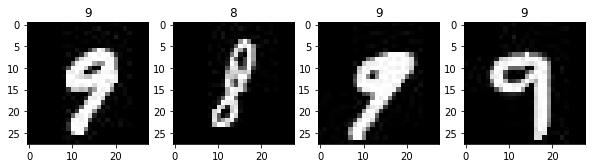

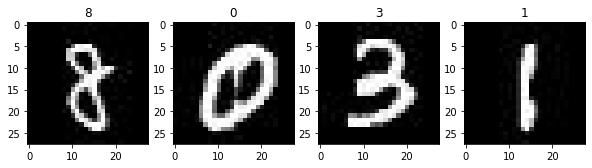

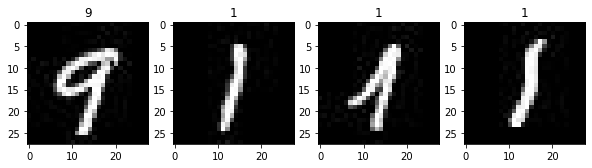

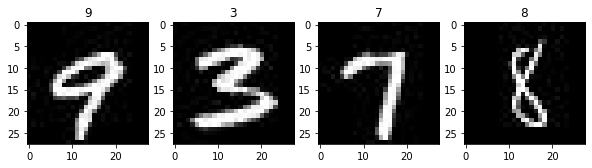

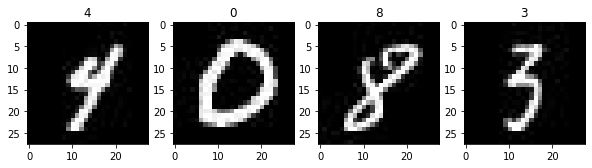

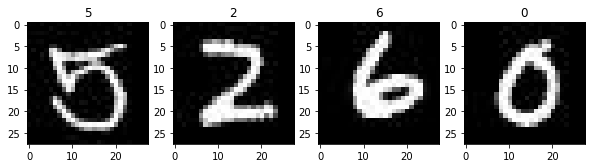

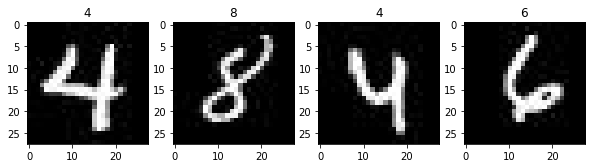

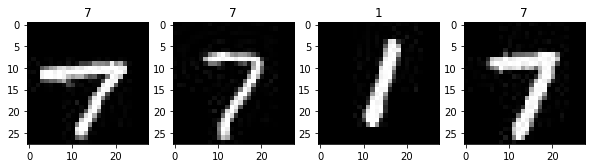

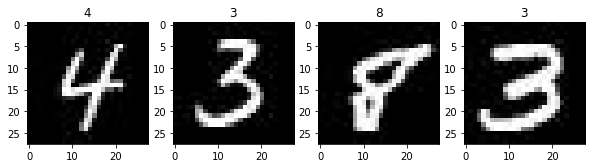

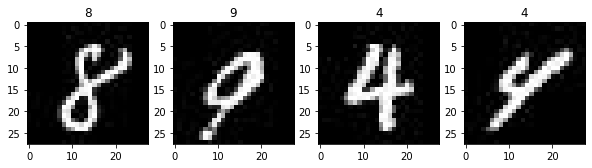

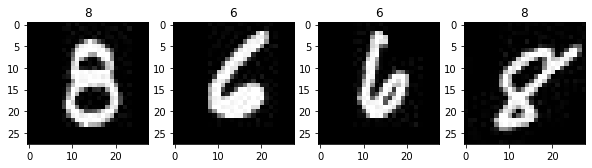

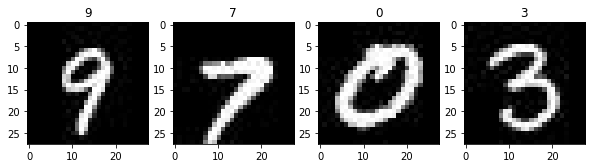

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt


for images, labels in dataloader:
    fig, axes = plt.subplots(1, 4, figsize=(10, 10))
    for i in range(4):
        sub = axes[i]
        sub.imshow(images[i].squeeze(), cmap='gray')
        sub.set_title(str(labels[i].item()))
    plt.show()

